## Promedios sobre la función de correlación
## Implementación en Python 
### José Alberto Moreno Guerra

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import scipy.stats as st
from random import random
import matplotlib.pyplot as plt
import math 
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
plt.style.use('classic')
%matplotlib inline

In [2]:
def save_data(x, y):
    arch = open('1_arch_.txt','w')
    for i in range(np.size(x)):
        var1 = x[i]*10**6
        var2 = y[i]*10**6
        arch.write(str(var1)+'\t'+str(var2)+'\n')
    arch.close()

### Se define la distribución de datos

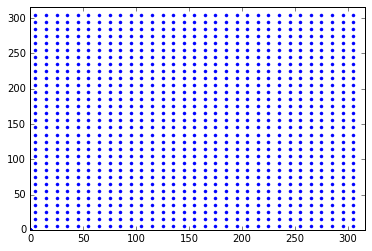

In [3]:
n=1000
rho=0.01
dim=np.sqrt(n/rho)
d=dim/np.sqrt(n)
x=np.zeros(n)
y=np.zeros(n)
radx=[]
rady=[]
k=0
for i in range(int(dim/d)):
    for j in range(int(dim/d)):   
        x[k]=(d/2)+d*i
        y[k]=(d/2)+d*j
        k=k+1
for i in range(n):
    radx.append((random()-0.5)*dim)
    rady.append((random()-0.5)*dim)
plt.plot(x,y, 'b.')
plt.axis([0.0, dim, 0.0, dim]) 
plt.show()

### Datos Aleatoriamente distribuidos

In [4]:
global radx, rady

def rad(m):
    radx=[]
    rady=[]
    for i in range(m*n):
        radx.append((random()-0.5)*dim)
        rady.append((random()-0.5)*dim)
    plt.plot(radx,rady, 'r.')
    plt.show()
    return radx, rady

### Función de correlación de dos puntos

$\zeta (r)=\frac{DD(r)}{RR(r)}-1$

In [5]:
global rdist, drand

def cor(x,y,xrand,yrand,dim,t_bins):
    global xf, err
    n = np.size(x)
    dmax = math.sqrt(2.0*(dim**2))
    ran = dmax/t_bins
    bins=np.linspace(0.0,dmax,t_bins)
    rdist = []
    drand = []
    gr = np.zeros(t_bins)
    grand = np.zeros(t_bins)
    err = np.zeros(t_bins)
    for i in range(n):
        for j in range(i+1,n-1):
            r = math.sqrt(((x[i]-x[j])**2)+(y[i]-y[j])**2)
            r_rand = math.sqrt(((xrand[i]-xrand[j])**2)+(yrand[i]-yrand[j])**2)
            rdist.append(r)
            drand.append(r_rand)
    plt.hist(rdist, bins=bins, edgecolor = 'black',  linewidth=1, color="blue",label = "$DD(r)$", alpha=0.5)
    plt.title("$Histogram$",fontsize = 18)
    plt.xlabel("$Count$",fontsize = 18)
    plt.ylabel("$Frequency$",fontsize = 18)
    plt.legend()
    plt.show()

    plt.hist(drand, bins=bins, edgecolor = 'black',  linewidth=1, color="red",label = "$RR(r)$", alpha=0.5)
    plt.title("$Histogram$",fontsize = 18)
    plt.xlabel("$Count$",fontsize = 18)
    plt.ylabel("$Frequency$",fontsize = 18)
    plt.legend()
    plt.show()
    for i in range(t_bins):
        for j in range(n):
            r = np.uint32((rdist[j])/ran)
            r_rand = np.uint32((drand[j])/ran)
            if(r<dmax):
                gr[int(r)]=gr[int(r)]+1
            if(r_rand<dmax):
                grand[int(r_rand)]=grand[int(r_rand)]+1
    for i in range(t_bins):
        if(grand[i]!=0):
            err[i]=(gr[i]/grand[i])-1
    xf=np.linspace(0,dmax,np.size(err))
    plt.plot(xf,err,'bo-')
    plt.xlabel("$r$",fontsize = 20)   # Establece el título del eje x
    plt.ylabel("$\zeta (r)$",fontsize = 20)   # Establece el título del eje y
    return gr, grand

In [6]:
def cf_mean(gr, grand, dim, t_bins):
    dmax = math.sqrt(2.0*(dim**2))
    err = np.zeros(t_bins)
    for i in range(t_bins):
        if(grand[i]!=0):
            err[i]=(gr[i]/grand[i])-1
    xf=np.linspace(0,dmax,np.size(err))
    plt.plot(xf,err,'bo-')
    plt.xlabel("$r$",fontsize = 20)   # Establece el título del eje x
    plt.ylabel("$\zeta (r)$",fontsize = 20)   # Establece el título del eje y

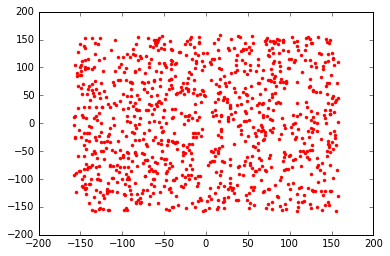

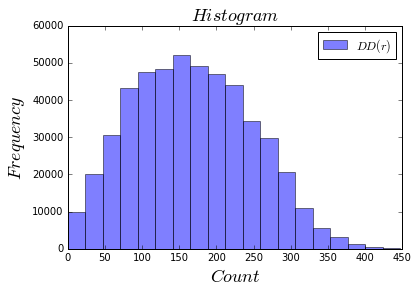

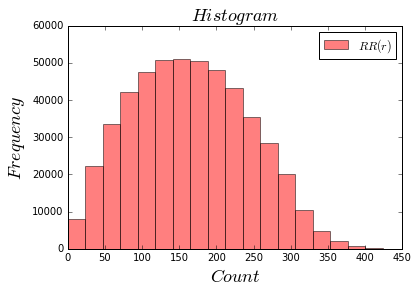

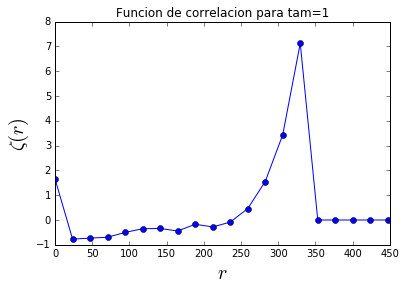

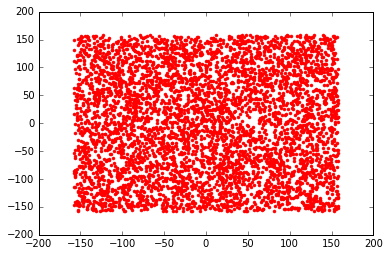

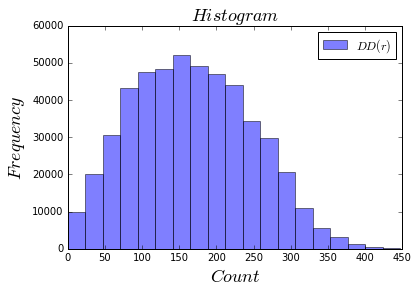

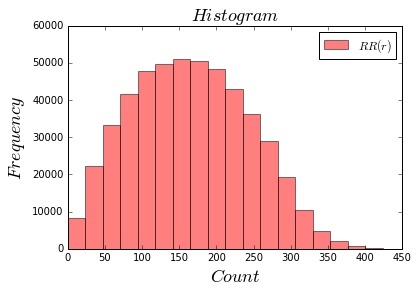

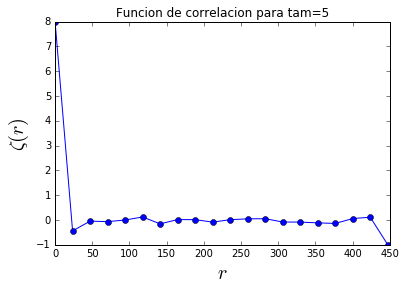

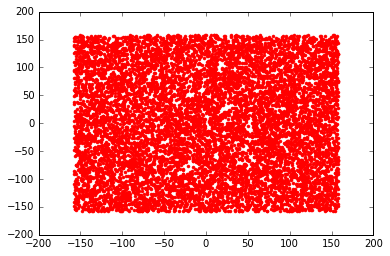

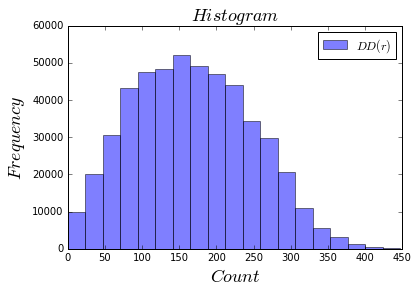

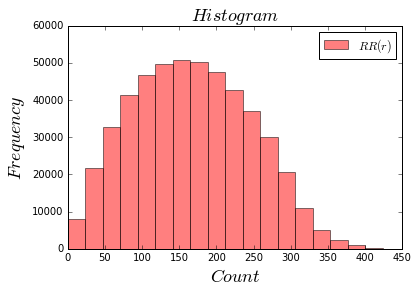

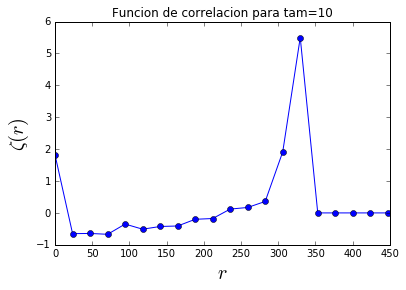

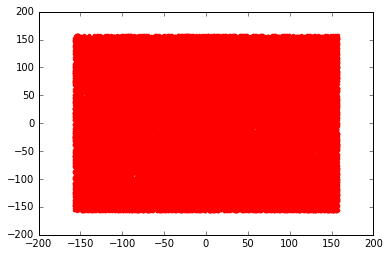

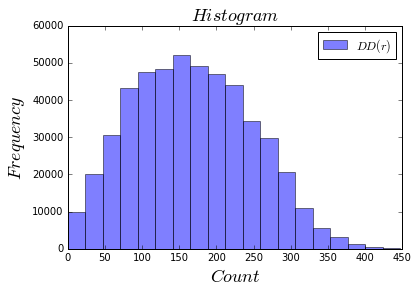

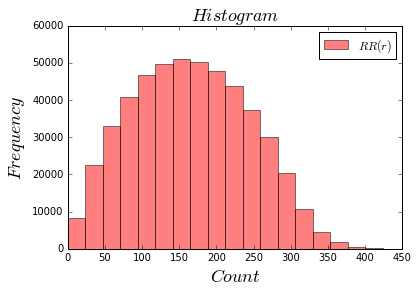

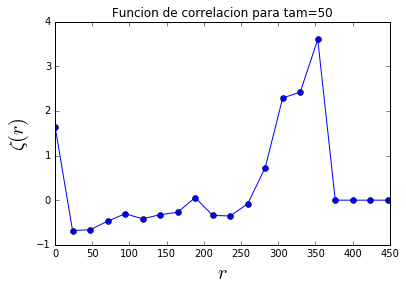

In [7]:
# Datos aleatorios con tamaño 1
rad1=rad(1)
g1=cor(x,y,rad1[0],rad1[1],dim,20)
plt.title('Funcion de correlacion para tam=1')
plt.show()
gr1=g1[0]
grd1=g1[1]
# Datos aletorios con tamaño 5
rad2=rad(5)
g2=cor(x,y,rad2[0],rad2[1],dim,20)
plt.title('Funcion de correlacion para tam=5')
plt.show()
gr2=g2[0]
grd2=g2[1]
# Datos aleatorios con tamaño 10
rad3=rad(10)
g3=cor(x,y,rad3[0],rad3[1],dim,20)
plt.title('Funcion de correlacion para tam=10')
plt.show()
gr3=g3[0]
grd3=g3[1]
# Datos aleatorios con tamaño 50
rad4=rad(50)
g4=cor(x,y,rad4[0],rad1[1],dim,20)
plt.title('Funcion de correlacion para tam=50')
plt.show()
gr4=g4[0]
grd4=g4[1]

dh_dist=(gr1+gr2+gr3+gr4)/4.0
rh_dist=(grd1+grd2+grd3+grd4)/4.0

### Promedio sobre los histogramas

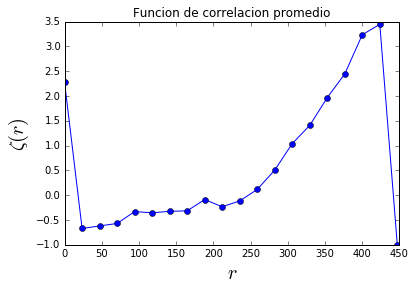

In [8]:
# Promedio
cf_mean(dh_dist, rh_dist, dim, 20)
plt.title('Funcion de correlacion promedio')
plt.show()